# Digit Recogniser
This is my code for digit recogniser competition 
My rank for in top 8% on the leaderbord at the time of submission

In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
train_data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [73]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [75]:
test=test.values.reshape(-1,28,28,1)

In [76]:
test=test/255

In [77]:
y=train_data['label']
X=train_data.drop('label',axis=1)

In [78]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
X=X.values.reshape(-1,28,28,1)

In [80]:
# pd.isnull(X[0])

In [81]:
X.max()

255

In [82]:
single_image=X[4]

In [83]:
single_image=single_image/255

In [84]:
# single_image

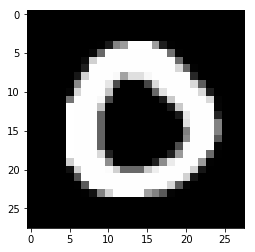

In [85]:
plt.imshow(single_image[:,:,0],cmap='gray')

In [86]:
X=X/255

In [87]:
# X

In [88]:
from keras.utils import to_categorical

In [89]:
# y_cat=to_categorical(y,10)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [92]:
y_cat_test=to_categorical(y_test)
y_cat_train=to_categorical(y_train)

In [93]:
# import matplotlib.pyplot as plt

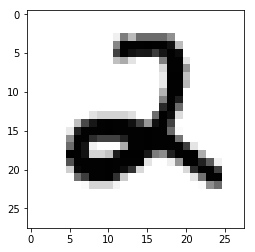

In [94]:
g = plt.imshow(X_train[0][:,:,0],cmap='gray_r')

In [95]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D

In [96]:
model=Sequential()

model.add(Conv2D(filters=32,input_shape=(28,28,1),kernel_size=(5,5),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [97]:
# from keras.preprocessing.image import ImageDataGenerator

In [98]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)

In [99]:
# datagen.fit(X_train)

In [100]:
# results = model.fit_generator((datagen.flow(X_train,y_cat_train, batch_size=16),epochs=1,
#                               steps_per_epoch=150,
#                               validation_data=(X_test,y_cat_test),
#                              validation_steps=12)

In [101]:
from keras.preprocessing.image import ImageDataGenerator

In [102]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [103]:
# image_gen=ImageDataGenerator(rotation_range=30,
#                             width_shift_range=0.1,
#                             height_shift_range=0.1,
#                             rescale=1/255,
#                             shear_range=0.2,
#                             zoom_range=0.2,
#                             horizontal_flip=False,
#                             vertical_flip=False,
#                             fill_mode='nearest')

In [104]:
# # image_gen.fit(X_train)
# gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
#                          height_shift_range=0.08, zoom_range=0.08)

# test_gen = ImageDataGenerator()

In [105]:
# train_generator = gen.flow(X_train, y_cat_train, batch_size=64)
# test_generator = test_gen.flow(X_test, y_cat_test, batch_size=64)

In [106]:
# model.fit_generator(train_generator, steps_per_epoch=6, epochs=5, 
#                     validation_data=test_generator, validation_steps=1)

In [107]:
# train_image_gen = image_gen.flow_from_dataframe((X_train,y_),
#                                                target_size=image_shape[:2],
#                                                batch_size=batch_size,
#                                               )

In [108]:
from tensorflow.keras.callbacks import EarlyStopping

In [109]:
early_stop=EarlyStopping(monitor='val_accuracy',mode='min',verbose=1,patience=3)

In [110]:
# import tensorflow as tf

In [111]:
# ln_fc = lambda x: 1e-3 * 0.985 ** x
# lrng_rt = tf.keras.callbacks.LearningRateScheduler(ln_fc)

In [112]:
# batch_size = 80
# history = model.fit_generator(image_gen.flow(X_train,y_cat_train, batch_size=batch_size),
#                               epochs = 5, validation_data = (X_test,y_cat_test),
#                               verbose = 1, steps_per_epoch = X_train.shape[0]//batch_size,callbacks=[early_stop])

In [113]:
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [114]:
# model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [115]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [116]:
# epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
# batch_size = 86

In [117]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(X_train)

In [118]:
history = model.fit_generator(datagen.flow(X_train,y_cat_train, batch_size=batch_size),
                              epochs = 100, validation_data = (X_test,y_cat_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              ,callbacks=[learning_rate_reduction])

Epoch 1/100
472/472 [==============================] - 69s 145ms/step - loss: 0.4253 - accuracy: 0.8631 - val_loss: 0.0838 - val_accuracy: 0.9738
Epoch 2/100
472/472 [==============================] - 68s 145ms/step - loss: 0.1237 - accuracy: 0.9618 - val_loss: 0.0787 - val_accuracy: 0.9719
Epoch 3/100
472/472 [==============================] - 72s 152ms/step - loss: 0.0903 - accuracy: 0.9723 - val_loss: 0.0394 - val_accuracy: 0.9888
Epoch 4/100
472/472 [==============================] - 68s 145ms/step - loss: 0.0692 - accuracy: 0.9788 - val_loss: 0.0267 - val_accuracy: 0.9902
Epoch 5/100
472/472 [==============================] - 69s 146ms/step - loss: 0.0613 - accuracy: 0.9814 - val_loss: 0.0465 - val_accuracy: 0.9848
Epoch 6/100
472/472 [==============================] - 68s 145ms/step - loss: 0.0567 - accuracy: 0.9823 - val_loss: 0.0273 - val_accuracy: 0.9914
Epoch 7/100
472/472 [==============================] - 68s 145ms/step - loss: 0.0506 - accuracy: 0.9846 - val_loss: 0.0248 -

472/472 [==============================] - 69s 145ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.0193 - val_accuracy: 0.9955
Epoch 54/100
472/472 [==============================] - 69s 146ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.0188 - val_accuracy: 0.9955
Epoch 55/100
472/472 [==============================] - 68s 145ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.0194 - val_accuracy: 0.9952
Epoch 56/100
472/472 [==============================] - 71s 150ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0188 - val_accuracy: 0.9955
Epoch 57/100
472/472 [==============================] - 69s 147ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0186 - val_accuracy: 0.9955
Epoch 58/100
472/472 [==============================] - 68s 145ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.0191 - val_accuracy: 0.9950
Epoch 59/100
472/472 [==============================] - 69s 145ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.0195 - val_a

In [119]:
# model.fit(X_train,y_cat_train,epochs=20)

In [120]:
# model.save('DigitGen1.h5')

In [121]:
from sklearn.metrics import classification_report

In [122]:
predictions=model.predict_classes(X_test)

In [123]:
 print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      1.00      1.00       473
           2       1.00      1.00      1.00       409
           3       1.00      0.99      1.00       426
           4       0.99      1.00      0.99       429
           5       1.00      1.00      1.00       382
           6       1.00      1.00      1.00       412
           7       0.99      1.00      1.00       469
           8       0.99      1.00      1.00       384
           9       1.00      0.99      0.99       394

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



In [124]:
predictions

array([3, 6, 9, ..., 9, 3, 7])

In [125]:
# print(confusion_matrix(y_test,predictions))

In [126]:
# results=np.argmax(predictions)

In [127]:
pd.Series(predictions,name="Label")

0       3
1       6
2       9
3       5
4       6
       ..
4195    8
4196    4
4197    9
4198    3
4199    7
Name: Label, Length: 4200, dtype: int64

In [128]:
results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [129]:
results

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [130]:
# results = np.argmax(predictions,axis = 1)

# results = pd.Series(results,name="Label")

In [131]:
sub=pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [132]:
# results = model.predict(test_data)
# results = np.argmax(results,axis = 1)
# results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("nn_mnist.csv",index=False)

In [133]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
